In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
%matplotlib inline


Partial dependency plots
==========================

Partial dependency plots consists in evaluating the model prediction
while varying one of more features and marginalizing (averaging) out the
effect of the other features.

They can be computed by varying only one feature, or more



In [2]:
# Load and prepare the data
X, y = datasets.fetch_california_housing(
    as_frame=True, return_X_y=True
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Train a GBRT



In [3]:
clf = GradientBoostingRegressor(
    n_estimators=100, max_depth=4, learning_rate=0.1,
    loss='huber', random_state=1
)
clf.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=4, random_state=1)

All-in-one plotting function
-----------------------------



Inspect feature 0, 3, 5, 6, and the interaction between 5 and 0, and 5
and 3



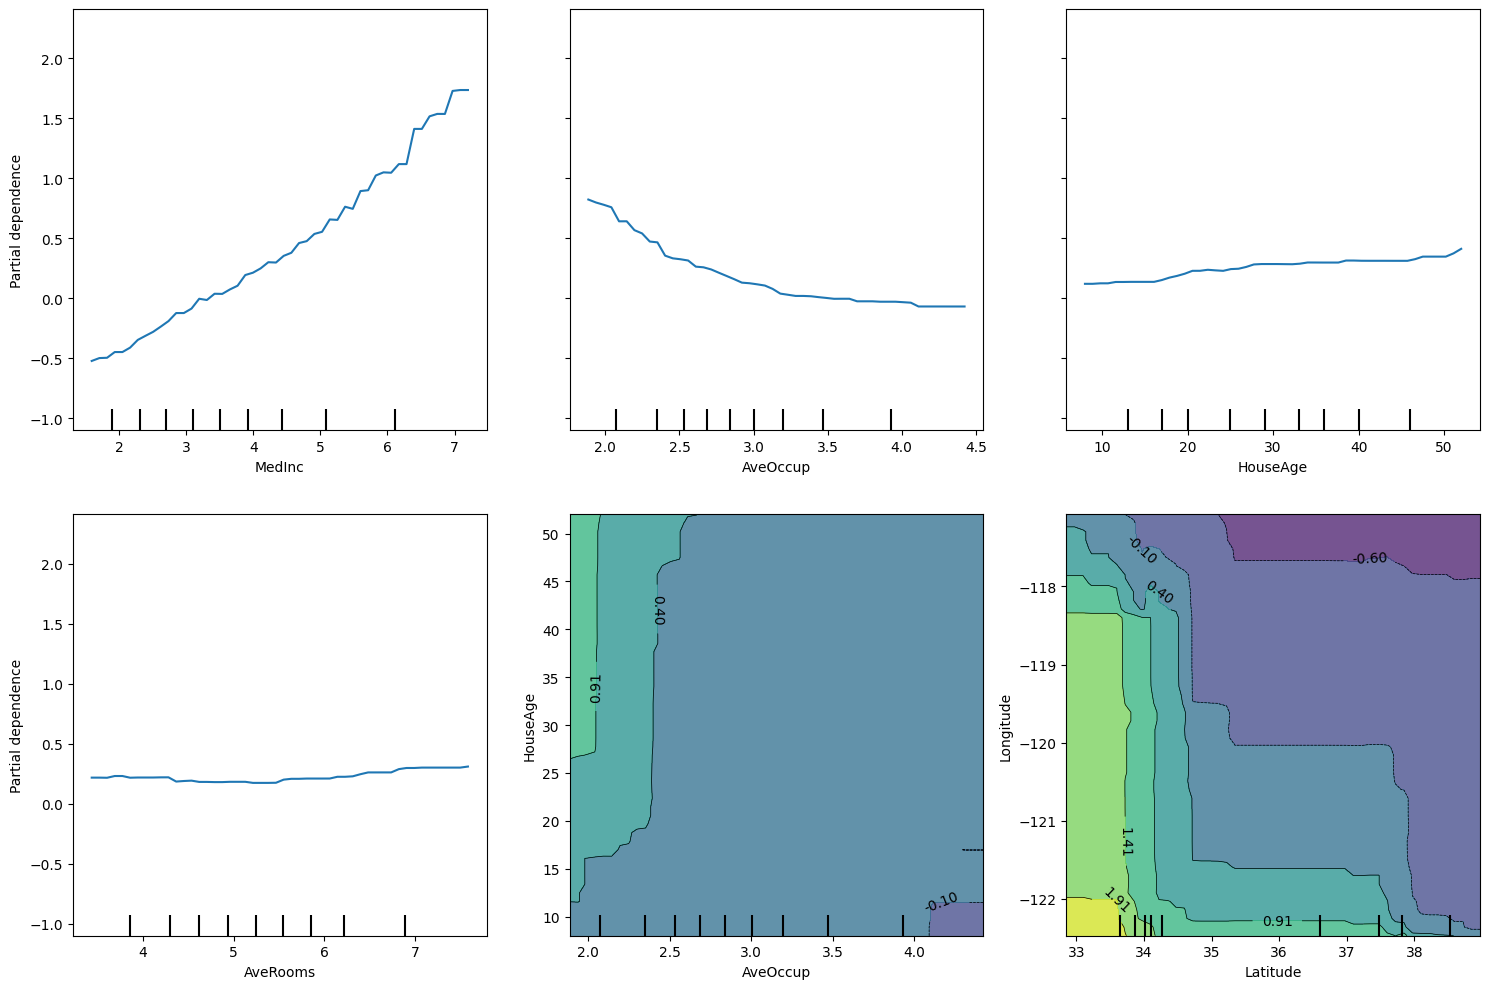

In [4]:
target_features = [
    'MedInc', 'AveOccup', 'HouseAge', 'AveRooms',
    ('AveOccup', 'HouseAge'), ('Latitude', 'Longitude')
]
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    clf, X_test, target_features,
    feature_names=X.columns,
    grid_resolution=50, ax=ax
)
plt.tight_layout()

Lower-level partial_dependence function
----------------------------------------



In [5]:
target_feature = ('Latitude', 'Longitude')
import numpy as np
from sklearn.inspection import partial_dependence


pdp = partial_dependence(
    clf, X=X_test, features=target_feature,
    grid_resolution=50, kind='average'
)

# The 2D coordinate grid (for plotting)
XX, YY = np.meshgrid(pdp['values'][0], pdp['values'][1])

# Reshape the partial deps on the grid
Z = pdp.average[0].T

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


3D plotting



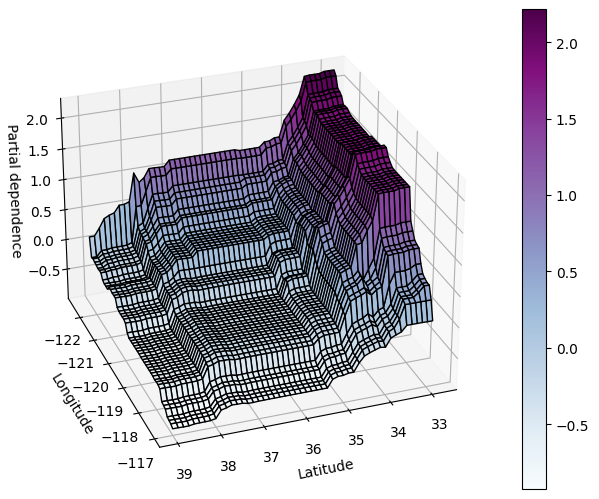

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(target_feature[0])
ax.set_ylabel(target_feature[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=28, azim=70)
plt.colorbar(surf)